In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 20)
%matplotlib inline

In [41]:
import glob

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly
import seaborn as sns

import geopandas as gpd

ModuleNotFoundError: No module named 'plotly'

In [2]:
df=pd.read_csv('data2.csv')
df

,trip_distance,day,week_day,hour,duration,ID
0,17.67,2,2,10,40.02,1233
1,17.92,4,4,5,32.00,1048
2,15.57,4,4,12,41.07,1161
3,1.78,1,1,0,9.80,4211
4,2.50,1,1,5,11.80,4068
...,...,...,...,...,...,...
6352134,22.79,30,2,15,52.32,132265
6352135,8.30,30,2,16,46.18,186265
6352136,7.08,30,2,21,16.13,132265
6352137,11.70,31,3,17,36.73,132265


In [3]:
df0=pd.read_csv('data.csv')
df0

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,day,week_day,hour,date,duration
0,2,2019-12-02T10:09:59.000+08:00,2019-12-02T10:50:00.000+08:00,2,17.67,3,N,233,1,2,69.50,0.00,0.00,0.00,18,0.30,87.80,0.00,2,2,10,2019-12-02,40.02
1,2,2019-12-04T05:48:24.000+08:00,2019-12-04T06:20:24.000+08:00,2,17.92,3,N,48,1,1,67.00,0.50,0.00,12.00,15,0.30,94.80,0.00,4,4,5,2019-12-04,32.00
2,2,2019-12-04T12:01:03.000+08:00,2019-12-04T12:42:07.000+08:00,1,15.57,5,N,161,1,1,60.00,0.00,0.50,0.00,0,0.30,63.30,2.50,4,4,12,2019-12-04,41.07
3,2,2019-12-01T00:07:47.000+08:00,2019-12-01T00:17:35.000+08:00,2,1.78,1,N,211,4,1,9.00,0.50,0.50,2.56,0,0.30,15.36,2.50,1,1,0,2019-12-01,9.80
4,1,2019-12-01T05:19:39.000+08:00,2019-12-01T05:31:27.000+08:00,1,2.50,1,N,68,4,1,10.50,3.00,0.50,2.20,0,0.30,16.50,2.50,1,1,5,2019-12-01,11.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6352134,2,2019-12-30T15:45:33.000+08:00,2019-12-30T16:37:52.000+08:00,1,22.79,1,N,132,265,1,63.50,0.00,0.50,35.70,0,0.30,100.00,0.00,30,2,15,2019-12-30,52.32
6352135,1,2019-12-30T16:42:46.000+08:00,2019-12-30T17:28:57.000+08:00,2,8.30,1,N,186,265,2,33.50,3.50,0.50,0.00,23,0.30,60.80,2.50,30,2,16,2019-12-30,46.18
6352136,2,2019-12-30T21:49:28.000+08:00,2019-12-30T22:05:36.000+08:00,1,7.08,4,N,132,265,2,26.00,0.50,0.50,0.00,0,0.30,27.30,0.00,30,2,21,2019-12-30,16.13
6352137,2,2019-12-31T17:30:27.000+08:00,2019-12-31T18:07:11.000+08:00,2,11.70,4,N,132,265,2,56.50,1.00,0.50,0.00,0,0.30,58.30,0.00,31,3,17,2019-12-31,36.73


# 高峰期

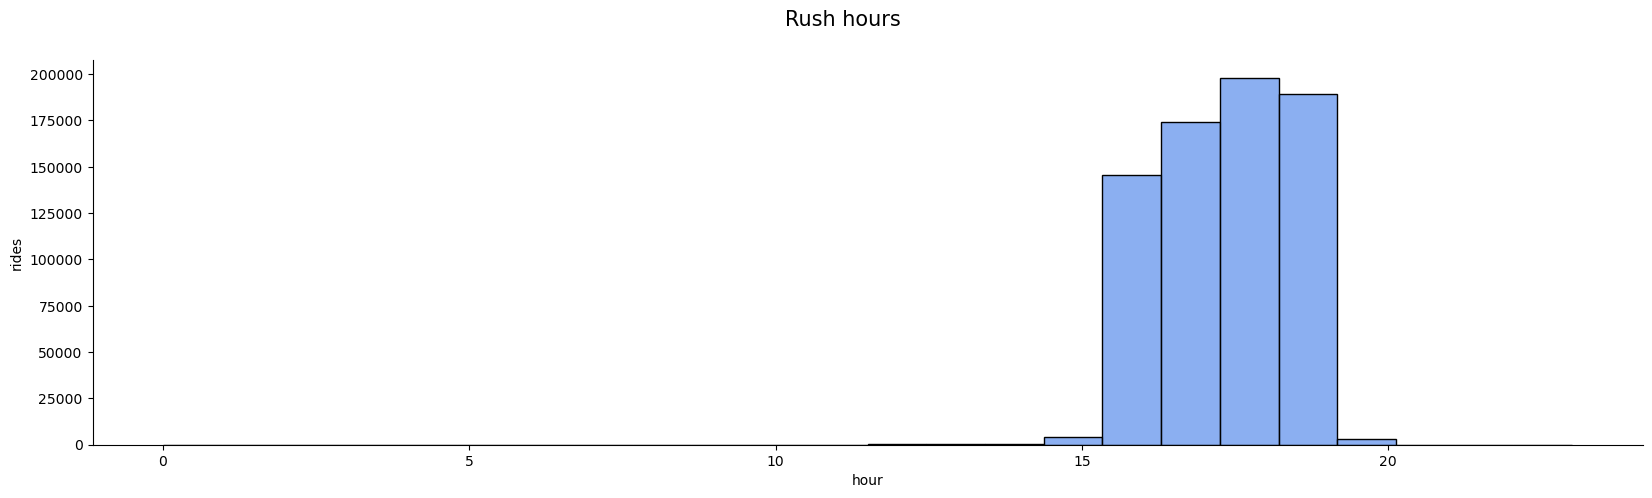

In [4]:
fig = plt.figure(figsize=(20, 5))
ax = sns.histplot(df0[df0['extra']==1].hour, bins=24, color='cornflowerblue')
ax.grid(False)
fig.suptitle('Rush hours', fontsize=15)
ax.set_xlabel('hour')
ax.set_ylabel('rides')
sns.despine()
plt.show()


# 距离和费用

In [5]:
distances_df = df0.groupby('hour', as_index=False)['trip_distance'] \
    .agg({'trip_distance' : 'mean'}) \
    .rename({'trip_distance' : 'av_dist'}, axis=1)

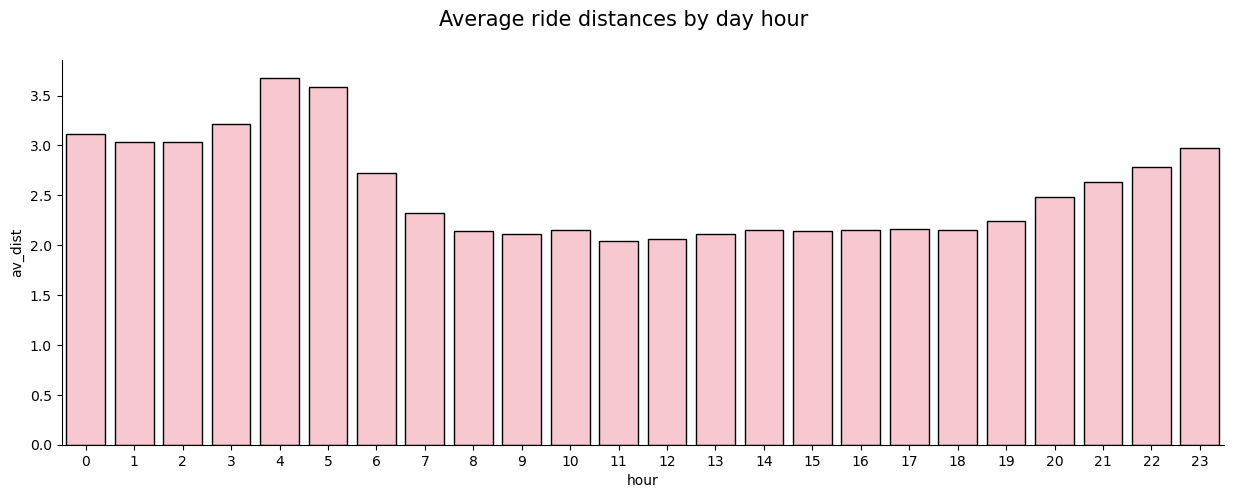

In [6]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=distances_df,
    x='hour',
    y='av_dist',
    color='pink',
    edgecolor='black'
)
fig.suptitle('Average ride distances by day hour', fontsize=15)
sns.despine()
plt.show()

In [7]:
avg_bill_df = df0.groupby('hour', as_index=False)['total_amount'] \
    .agg({'total_amount' : 'mean'}) \
    .rename({'total_amount' : 'avg_bill'}, axis=1)

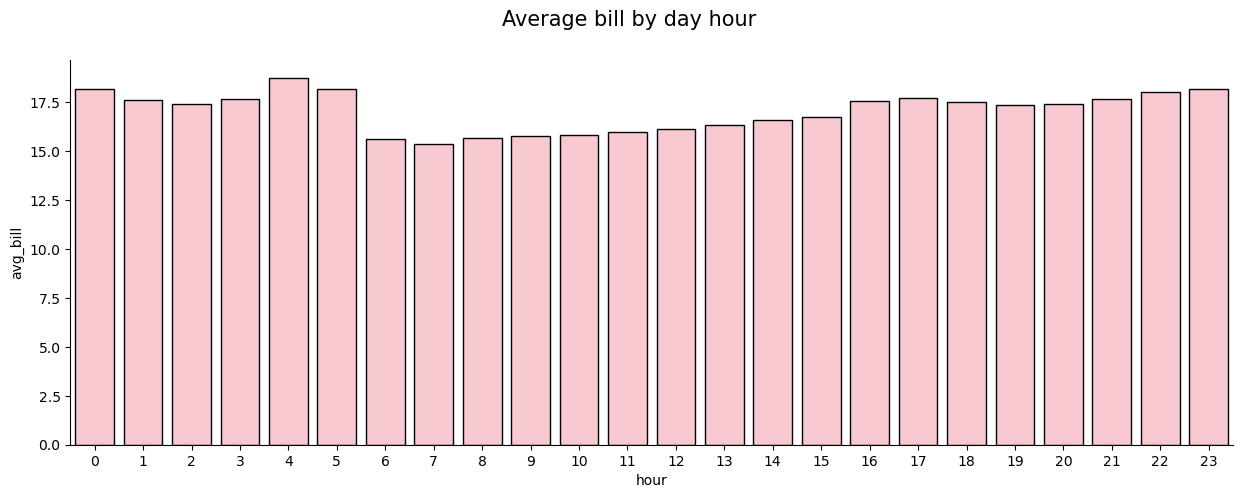

In [8]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=avg_bill_df,
    x='hour',
    y='avg_bill',
    color='pink',
    edgecolor='black'
)
fig.suptitle('Average bill by day hour ', fontsize=15)
sns.despine()
plt.show()

In [53]:
df0

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,day,week_day,hour,date,duration
0,2,2019-12-02T10:09:59.000+08:00,2019-12-02T10:50:00.000+08:00,2,17.67,3,N,233,1,2,69.50,0.00,0.00,0.00,18,0.30,87.80,0.00,2,2,10,2019-12-02,40.02
1,2,2019-12-04T05:48:24.000+08:00,2019-12-04T06:20:24.000+08:00,2,17.92,3,N,48,1,1,67.00,0.50,0.00,12.00,15,0.30,94.80,0.00,4,4,5,2019-12-04,32.00
2,2,2019-12-04T12:01:03.000+08:00,2019-12-04T12:42:07.000+08:00,1,15.57,5,N,161,1,1,60.00,0.00,0.50,0.00,0,0.30,63.30,2.50,4,4,12,2019-12-04,41.07
3,2,2019-12-01T00:07:47.000+08:00,2019-12-01T00:17:35.000+08:00,2,1.78,1,N,211,4,1,9.00,0.50,0.50,2.56,0,0.30,15.36,2.50,1,1,0,2019-12-01,9.80
4,1,2019-12-01T05:19:39.000+08:00,2019-12-01T05:31:27.000+08:00,1,2.50,1,N,68,4,1,10.50,3.00,0.50,2.20,0,0.30,16.50,2.50,1,1,5,2019-12-01,11.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6352134,2,2019-12-30T15:45:33.000+08:00,2019-12-30T16:37:52.000+08:00,1,22.79,1,N,132,265,1,63.50,0.00,0.50,35.70,0,0.30,100.00,0.00,30,2,15,2019-12-30,52.32
6352135,1,2019-12-30T16:42:46.000+08:00,2019-12-30T17:28:57.000+08:00,2,8.30,1,N,186,265,2,33.50,3.50,0.50,0.00,23,0.30,60.80,2.50,30,2,16,2019-12-30,46.18
6352136,2,2019-12-30T21:49:28.000+08:00,2019-12-30T22:05:36.000+08:00,1,7.08,4,N,132,265,2,26.00,0.50,0.50,0.00,0,0.30,27.30,0.00,30,2,21,2019-12-30,16.13
6352137,2,2019-12-31T17:30:27.000+08:00,2019-12-31T18:07:11.000+08:00,2,11.70,4,N,132,265,2,56.50,1.00,0.50,0.00,0,0.30,58.30,0.00,31,3,17,2019-12-31,36.73


In [88]:
df0.loc[df0[df0.duration >=40].index.tolist(),'long'] = 1

df0=df0.fillna(0)

In [ ]:
df0

In [90]:
time=df0.groupby(['day']).agg({'long' : 'mean'})
time['long']=time['long']*100

In [94]:
time[2:13]

,long
day,
3,2.05
4,2.59
5,2.50
6,2.26
7,2.07
8,1.47
9,2.94
10,3.20
11,2.15


# 上下车地点分析

In [63]:
top10_pickup_districts = df0.groupby(['PULocationID','hour']).count()
  




In [71]:
zone =top10_pickup_districts.pivot_table(
    index='PULocationID',
    columns='hour',
    values='VendorID',
    
)

In [74]:
zone=zone.fillna(0)
zone

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
PULocationID,,,,,,,,,,,,,,,,,,,,,,,,
1,0.00,0.00,0.00,0.00,2.00,2.00,4.00,2.00,1.00,2.00,2.00,0.00,1.00,6.00,2.00,1.00,3.00,4.00,3.00,7.00,0.00,1.00,1.00,1.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,2.00,0.00
3,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,3.00,1.00,2.00,1.00,1.00,4.00,0.00,1.00,3.00,1.00,1.00,4.00,1.00,3.00,1.00
4,828.00,810.00,715.00,418.00,201.00,83.00,167.00,359.00,550.00,499.00,429.00,330.00,337.00,334.00,317.00,316.00,314.00,391.00,450.00,508.00,541.00,522.00,703.00,767.00
5,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,4.00,1.00,5.00,1.00,1.00,0.00,0.00,2.00,2.00,7.00,2.00,1.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,759.00,456.00,257.00,140.00,117.00,157.00,378.00,673.00,925.00,"1,265.00","1,771.00","2,597.00","3,196.00","3,398.00","3,552.00","3,247.00","2,753.00","2,761.00","2,825.00","2,408.00","2,168.00","1,879.00","1,591.00","1,117.00"
262,531.00,329.00,188.00,152.00,168.00,703.00,"2,953.00","5,895.00","6,435.00","6,904.00","6,560.00","5,886.00","5,410.00","4,629.00","4,526.00","5,130.00","4,429.00","4,984.00","5,211.00","4,399.00","2,972.00","2,324.00","1,670.00","1,122.00"
263,"2,979.00","2,171.00","1,465.00","1,018.00",837.00,"1,149.00","3,039.00","5,586.00","7,029.00","7,165.00","7,017.00","6,896.00","6,858.00","6,723.00","6,977.00","7,331.00","6,751.00","7,410.00","8,129.00","7,263.00","6,464.00","6,128.00","5,183.00","4,078.00"


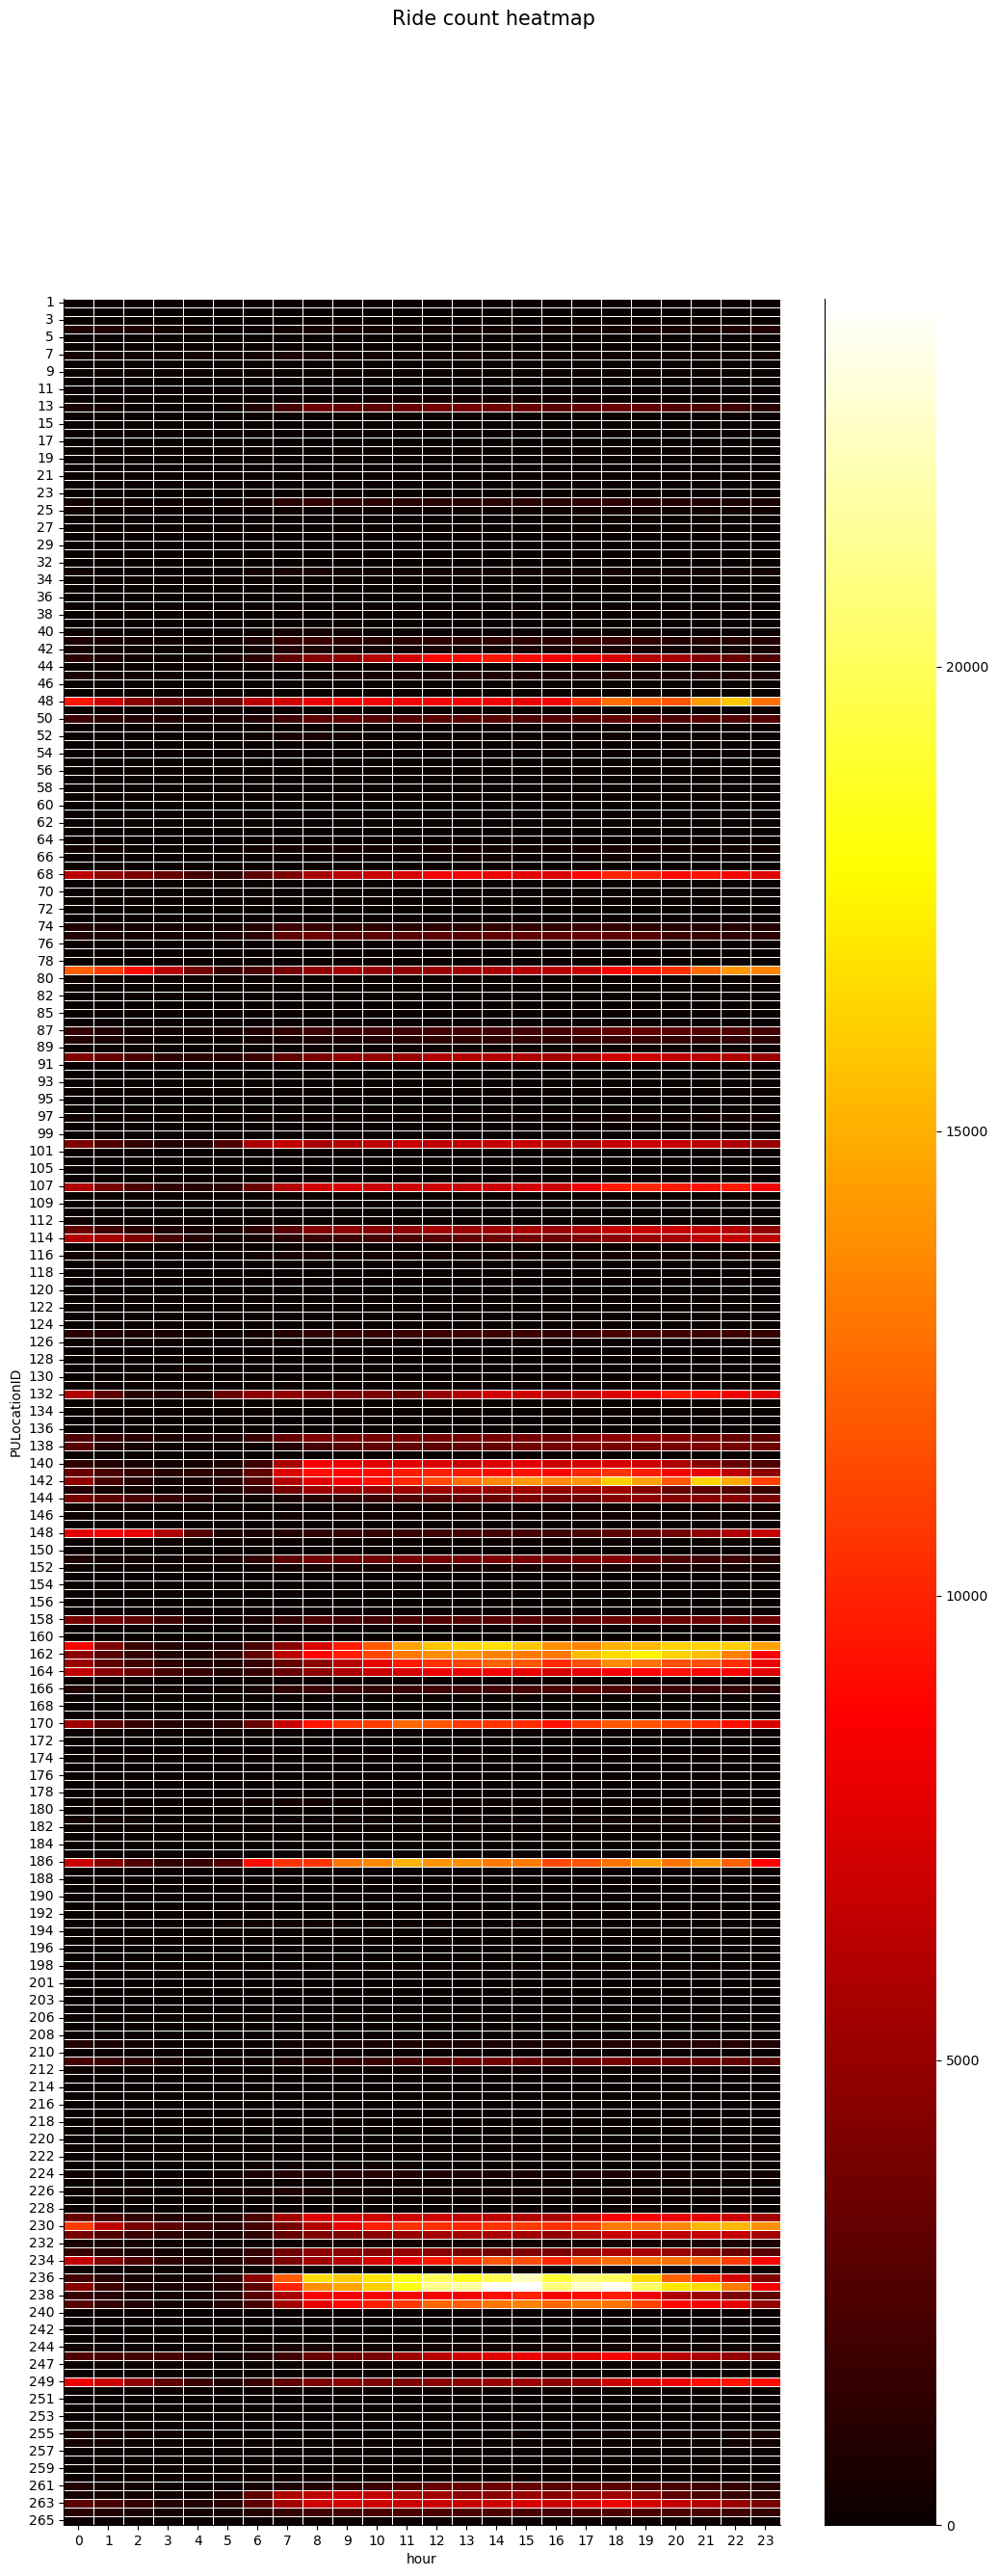

In [78]:
fig = plt.figure(figsize=(12, 30))
ax = sns.heatmap(
    data=zone,
    fmt='.1%',
    linewidths=0.5,
    cmap="hot"
)
fig.suptitle('Ride count heatmap ', fontsize=15)
sns.despine()
plt.show()

In [10]:
top10_dropoff_districts = df0.groupby('DOLocationID', as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'count'}, axis=1) \
    .sort_values('count', ascending=False) \
    .head(10)
top10_dropoff_districts

,DOLocationID,count
230,236,288490
231,237,276620
156,161,251077
157,162,197253
165,170,193762
224,230,193127
137,142,189244
47,48,180993
233,239,174729
181,186,174139


In [11]:
taxi_zone_lookup = pd.read_csv('taxi_zones.csv') \
    .drop('service_zone', axis=1)


In [12]:
top10_pickup_districts = top10_pickup_districts.merge(
    taxi_zone_lookup,
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

In [34]:
top10_dropoff_districts = top10_dropoff_districts.merge(
    taxi_zone_lookup,
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)
top10_dropoff_districts 

,DOLocationID,count,LocationID_x,Borough_x,Zone_x,LocationID_y,Borough_y,Zone_y
0,236,288490,236,Manhattan,Upper East Side North,236,Manhattan,Upper East Side North
1,237,276620,237,Manhattan,Upper East Side South,237,Manhattan,Upper East Side South
2,161,251077,161,Manhattan,Midtown Center,161,Manhattan,Midtown Center
3,162,197253,162,Manhattan,Midtown East,162,Manhattan,Midtown East
4,170,193762,170,Manhattan,Murray Hill,170,Manhattan,Murray Hill
5,230,193127,230,Manhattan,Times Sq/Theatre District,230,Manhattan,Times Sq/Theatre District
6,142,189244,142,Manhattan,Lincoln Square East,142,Manhattan,Lincoln Square East
7,48,180993,48,Manhattan,Clinton East,48,Manhattan,Clinton East
8,239,174729,239,Manhattan,Upper West Side South,239,Manhattan,Upper West Side South
9,186,174139,186,Manhattan,Penn Station/Madison Sq West,186,Manhattan,Penn Station/Madison Sq West


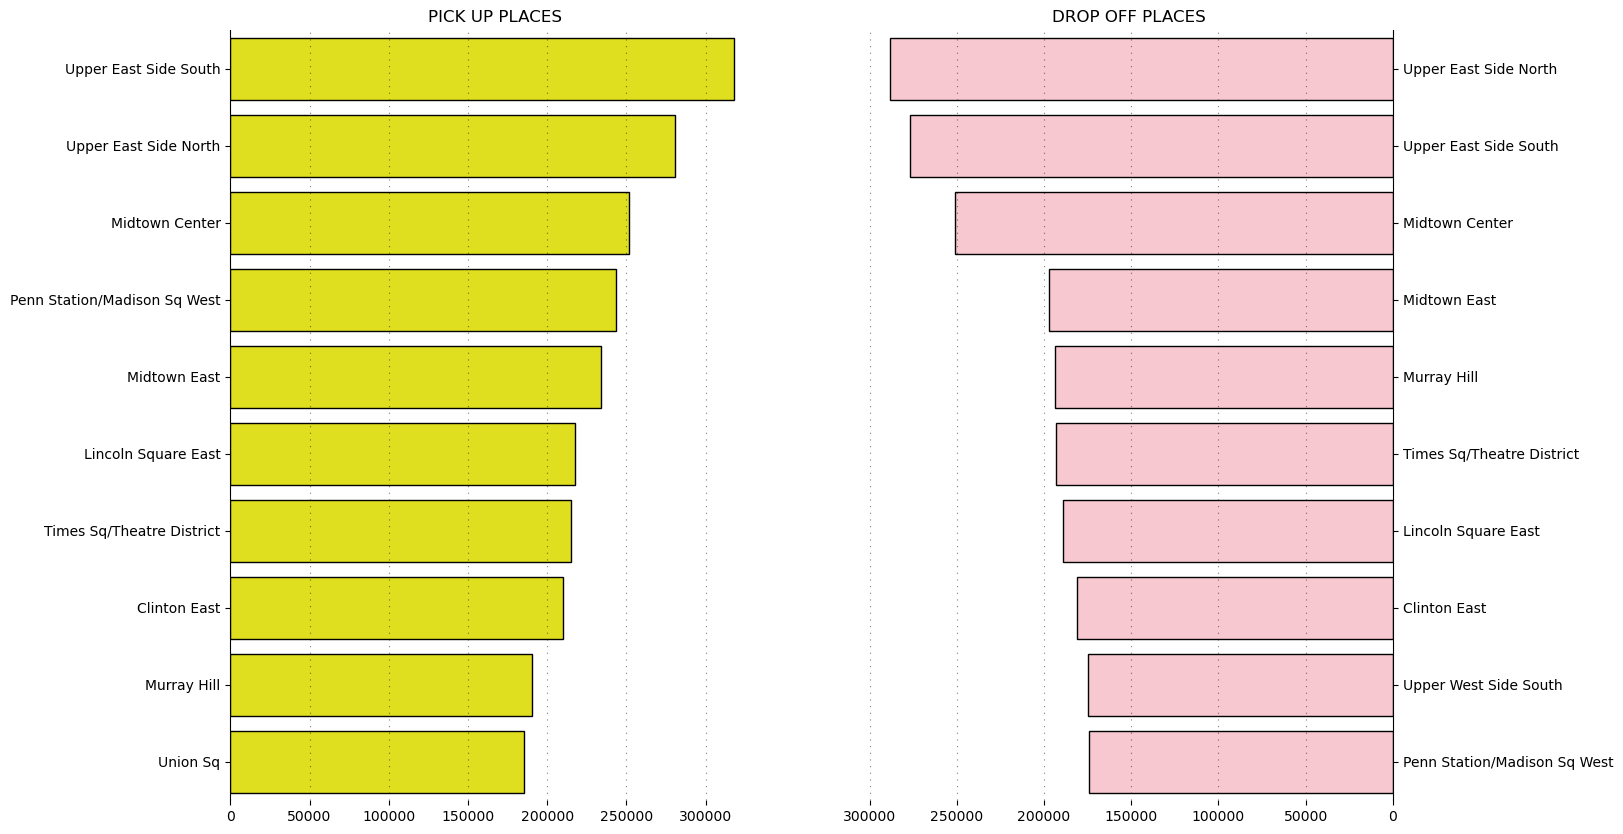

In [14]:
fig = plt.figure(figsize=(15, 10))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

sns.barplot(
    data=top10_pickup_districts,
    x='count',
    y='Zone',
    color='yellow',
    edgecolor='black',
    ax=ax0
)

sns.barplot(
    data=top10_dropoff_districts,
    x='count',
    y='Zone',
    color='pink',
    edgecolor='black',
    ax=ax1
)
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')

ax0.grid(color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
ax1.grid(color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)

ax0.set_title('PICK UP PLACES')
ax1.set_title('DROP OFF PLACES')

ax0.set_ylabel('')
ax1.set_ylabel('')
ax0.set_xlabel('')
ax1.set_xlabel('')

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
for s in ['top', 'bottom','left']:    
    ax1.spines[s].set_visible(False)
plt.show()

In [15]:
popular_directions = df0.groupby(['PULocationID', 'DOLocationID'], as_index=False)['VendorID'].count() \
    .dropna() \
    .rename({'VendorID' : 'count'}, axis=1) \
    .sort_values('count', ascending=False) \
    .head(20)

In [39]:

picklocation = df0.groupby(['PULocationID'], as_index=False)['VendorID'].count() \
    .dropna() \
    .rename({'VendorID' : 'count'}, axis=1) \
    .sort_values('count', ascending=False) \

picklocation

,PULocationID,count
229,237,317618
228,236,280529
155,161,251742
180,186,243580
156,162,234178
...,...,...
93,96,2
96,99,1
44,46,1
26,27,1


In [40]:
loc_df=gpd.read_file(r'zones.geojson')
loc_df['PULocationID']=loc_df['LocationID'].astype(int) #to make merge easier

NameError: name 'gpd' is not defined

.........


In [17]:
popular_directions = popular_directions.merge(
    taxi_zone_lookup,
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
).rename({'Zone' : 'pick_up_nh'}, axis=1).drop(['LocationID', 'Borough'], axis=1).merge(
    taxi_zone_lookup,
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
).rename({'Zone' : 'drop_off_nh'}, axis=1).drop(['LocationID', 'Borough'], axis=1)

In [18]:
popular_directions

,PULocationID,DOLocationID,count,pick_up_nh,drop_off_nh
0,237,236,49243,Upper East Side South,Upper East Side North
1,236,237,41690,Upper East Side North,Upper East Side South
2,236,236,40500,Upper East Side North,Upper East Side North
3,237,237,39318,Upper East Side South,Upper East Side South
4,264,264,24892,NV,NV
5,239,238,21127,Upper West Side South,Upper West Side North
6,239,142,20866,Upper West Side South,Lincoln Square East
7,186,230,20391,Penn Station/Madison Sq West,Times Sq/Theatre District
8,142,239,20080,Lincoln Square East,Upper West Side South
9,237,162,19706,Upper East Side South,Midtown East


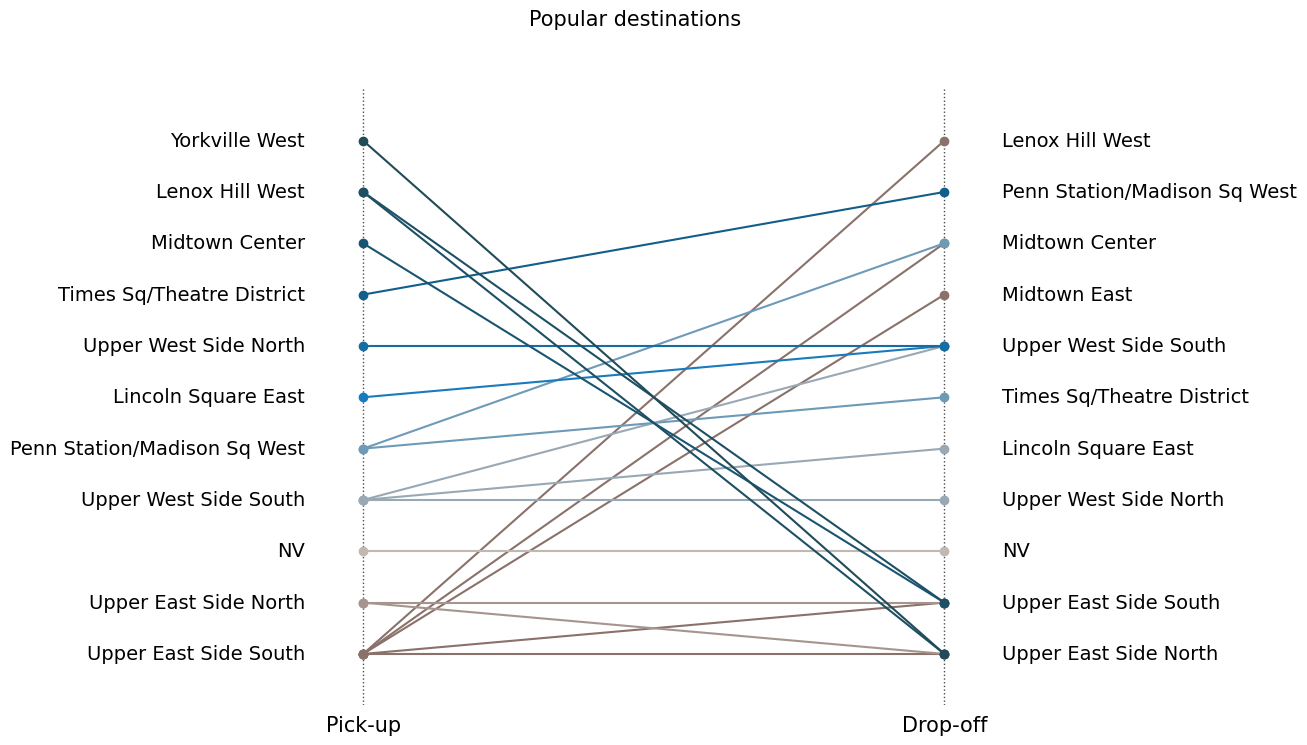

In [19]:
import matplotlib.lines as mlines
colors_list = ['#8A716A',
               '#A6958E',
               '#C2B8B2',
               '#98a9b5',
               '#6e9ab8',
               '#197bbd',
               '#166da4',
               '#125e8a',
               '#195571',
               '#1d5064',
               '#204b57'
              ]
left_label = list(popular_directions.pick_up_nh.unique())
right_label = list(popular_directions.drop_off_nh.unique())

fig, ax = plt.subplots(1,1,figsize=(15,8), facecolor='white')

fig.suptitle('Popular destinations', fontsize=15)

ax.vlines(x=1, ymin=-1, ymax=12, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=-1, ymax=12, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

for num, district in enumerate(left_label):
    ax.text(0.8, num, s=left_label[num], horizontalalignment='right', verticalalignment='center', fontdict={'size':14})

for num, district in enumerate(right_label):
    ax.text(3.2, num, s=right_label[num], horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

for num, district in enumerate(left_label):
    N = [i for i, x in enumerate(popular_directions.pick_up_nh) if x == left_label[num]]
    for i in N:
        d = popular_directions.drop_off_nh[i]
        j = right_label.index(d)
        ax = plt.gca()
        l = mlines.Line2D([1, 3], [num, j], marker='o', markersize=6, color=colors_list[num])
        ax.add_line(l)

ax.set(xlim=(0,4), ylim=(-1, 11), ylabel='')
ax.set_xticks([1,3])
ax.set_xticklabels(['Pick-up', 'Drop-off'],fontsize=15)
ax.tick_params(axis='both',which='both',left=False,bottom=False,labelleft=False) 

for s in ['top', 'bottom','left', 'right']:    
    ax.spines[s].set_visible(False)

plt.show()

In [20]:
location= df0.pivot_table(
    index='PULocationID',
    columns='DOLocationID',
    values='VendorID',
    aggfunc='count'
)

In [21]:
location=location.fillna(0)
location

DOLocationID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,100,101,102,105,106,107,108,109,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265
PULocationID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,14.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.0

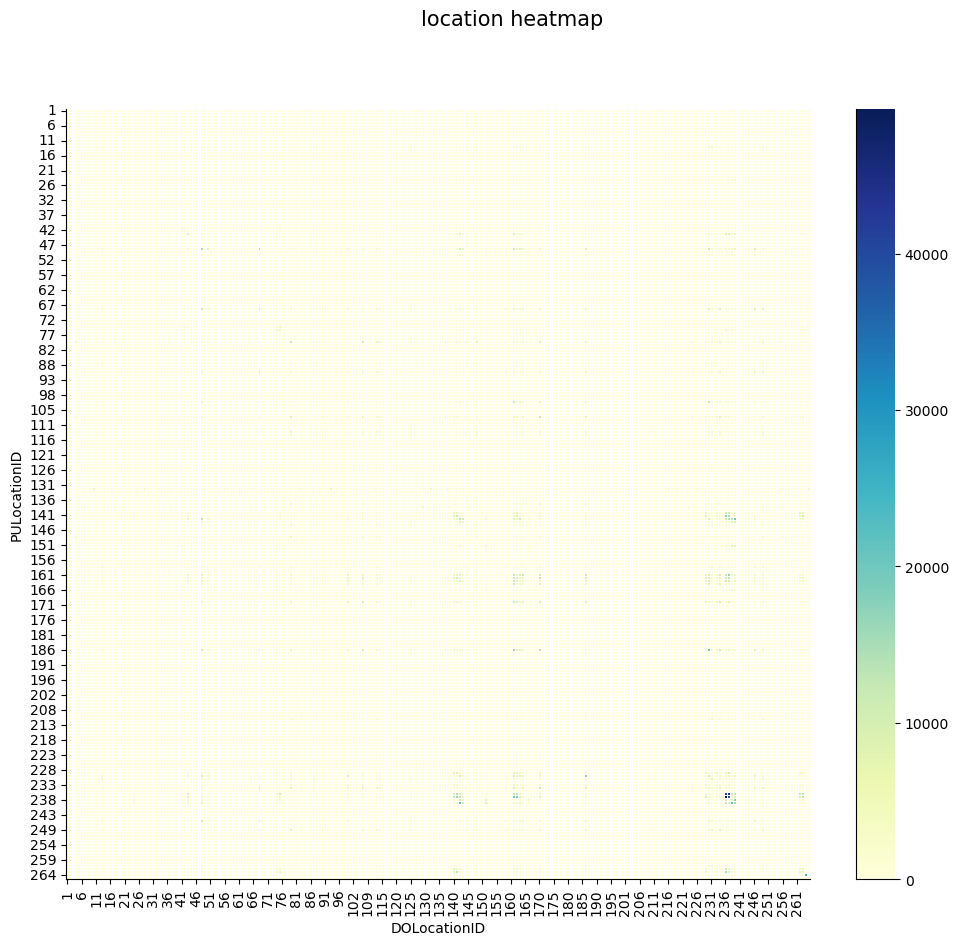

In [22]:
fig = plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    data=location,
    fmt='.1%',
    linewidths=0.5,
    cmap="YlGnBu"
)
fig.suptitle('location heatmap ', fontsize=15)
sns.despine()
plt.show()

# 时间和接单量关系


In [23]:
days_df = df.groupby('day', as_index=False)['ID'] \
    .agg({'ID' : 'count'}) \
    .rename({'ID' : 'total_rides'}, axis=1)

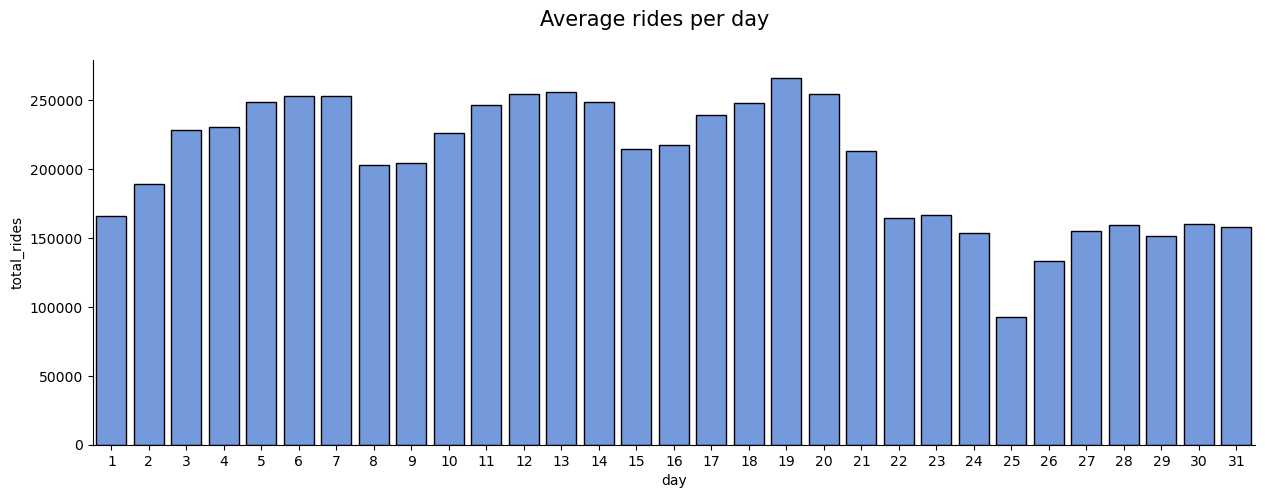

In [24]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=days_df,
    x='day',
    y='total_rides',
    color='cornflowerblue',
    edgecolor='black'
)
fig.suptitle('Average rides per day', fontsize=15)
sns.despine()
plt.show()


In [25]:
hours = df.pivot_table(
    index='day',
    columns='hour',
    values='ID',
    aggfunc='count'
)

In [26]:
hours

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,7213,5922,4708,3579,2310,1184,1630,2495,4047,6011,8021,10439,10943,12311,11280,10218,11027,10669,10013,8344,7564,6672,5150,3843
2,2737,1463,1003,593,680,1759,4743,9204,12368,10309,9492,10219,10446,10162,10940,11328,9938,11536,13072,11972,10938,10459,8115,5401
3,3061,1972,1115,735,773,1846,5348,10880,13330,11829,10886,11569,11313,11248,12303,12927,11634,14063,15847,14805,14510,14977,12953,8480
4,4899,2534,1408,870,896,1850,4998,11029,13681,12288,11289,11732,12018,11765,12454,12325,10572,12642,14752,14137,13708,14350,13538,10351
5,6238,3300,1948,1165,971,1919,5156,11076,13441,12233,11471,12100,12390,12123,13198,13198,11129,13756,15854,15720,15592,16299,15317,13235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,3415,2109,1463,1043,832,1048,2378,3379,4946,6473,7344,8406,9247,9731,10079,10321,9841,10222,10361,10026,8256,8477,8569,7106
28,5859,4533,3674,2691,1917,997,1477,2114,3340,5290,7176,8889,9205,9676,9769,10563,9772,9975,10034,9781,8180,8155,8430,7609
29,7603,5433,4128,3206,2201,941,1323,1945,2966,4708,6546,7727,8889,9046,9456,10112,9799,9577,10592,9071,7829,7171,6105,4721


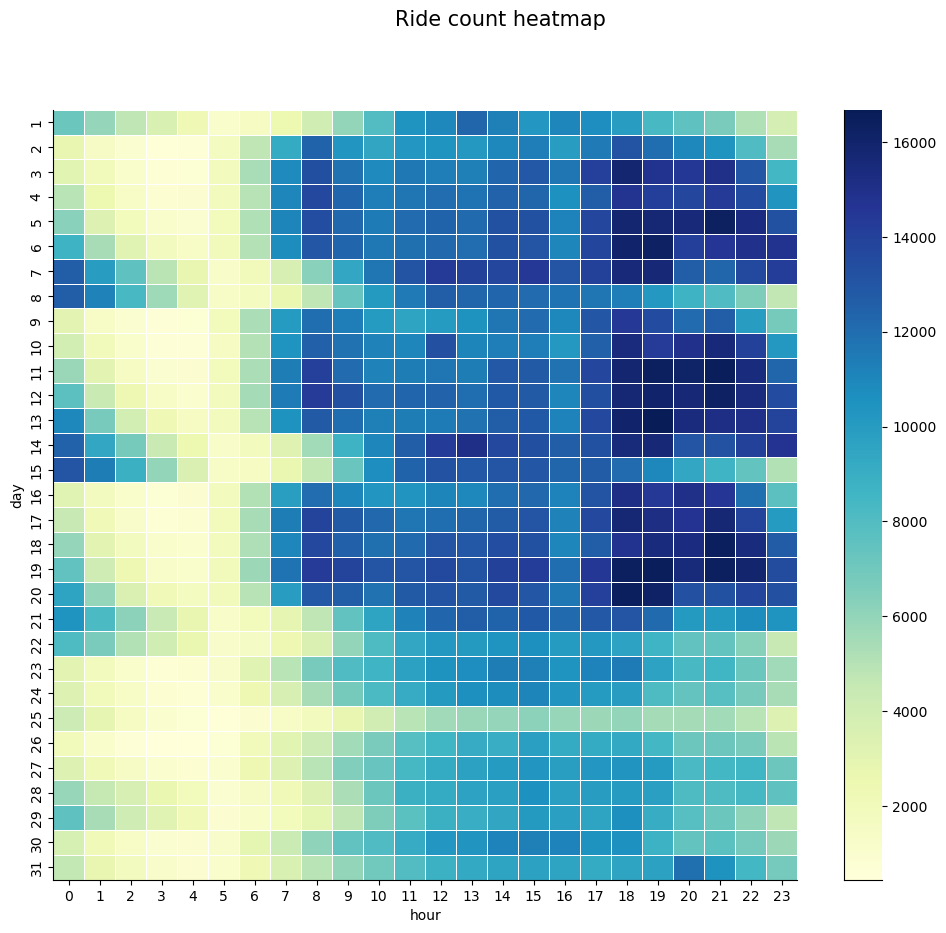

In [27]:
fig = plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    data=hours,
    fmt='.1%',
    linewidths=0.5,
    cmap="YlGnBu"
)
fig.suptitle('Ride count heatmap ', fontsize=15)
sns.despine()
plt.show()

In [28]:
df1=df.groupby('ID').agg({'trip_distance':'mean'}).sort_values('ID')

In [29]:
df

,trip_distance,day,week_day,hour,duration,ID
0,17.67,2,2,10,40.02,1233
1,17.92,4,4,5,32.00,1048
2,15.57,4,4,12,41.07,1161
3,1.78,1,1,0,9.80,4211
4,2.50,1,1,5,11.80,4068
...,...,...,...,...,...,...
6352134,22.79,30,2,15,52.32,132265
6352135,8.30,30,2,16,46.18,186265
6352136,7.08,30,2,21,16.13,132265
6352137,11.70,31,3,17,36.73,132265


In [30]:
df1

,trip_distance
ID,
1001,1.43
1004,16.23
1012,16.95
1013,15.27
1024,26.19
...,...
263264,2.17
263265,12.58
264264,2.29


In [31]:
df1 = df.groupby('ID', as_index=False)['trip_distance'] \
    .agg({'trip_distance' : 'mean'}) 

In [32]:
df1['ID1']=df1['ID']%1000
df1['ID2']=(df1['ID']-df1['ID1'])/1000

In [33]:
df1.sort_values('trip_distance')

,ID,trip_distance,ID1,ID2
12926,178263,0.01,263,178.00
13639,206206,0.06,206,206.00
2468,31185,0.20,185,31.00
13082,183183,0.23,183,183.00
3745,43180,0.25,180,43.00
...,...,...,...,...
13933,218265,41.84,265,218.00
5400,62265,43.20,265,62.00
9728,124265,58.05,265,124.00
11861,155265,60.27,265,155.00


In [35]:
dis=pd.read_csv('distance.csv')

In [36]:
dis

,ID1,ID2,Zone2,Zone1,distance
0,1,1,Newark Airport,Newark Airport,1.43
1,4,1,Newark Airport,Alphabet City,16.23
2,12,1,Newark Airport,Battery Park,16.95
3,13,1,Newark Airport,Battery Park City,15.27
4,24,1,Newark Airport,Bloomingdale,26.19
...,...,...,...,...,...
14633,264,263,Yorkville West,NV,2.17
14634,265,263,Yorkville West,NaN,12.58
14635,264,264,NV,NV,2.29
14636,265,264,NV,NaN,9.35
